# Team:
# Antoine Abou Faycal & Mahdi Alhakim
# EECE 490
# GitHub Link: https://github.com/antoineabf/EECE490_Hackathon

## **1. Introduction**

In this notebook, we built a **Logistic Regression** classification model to predict daily cigarette consumption categories based on various demographic and personality traits. The process includes data loading, preprocessing, encoding categorical variables, model training, evaluation, and visualization of results.

---

## **2. Import Necessary Libraries**

We begin by importing all the required libraries for data manipulation, visualization, and machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization aesthetics
sns.set(style="whitegrid")



---

## **3. Load the Dataset**

Load the dataset from an Excel file. Ensure that the file `'2024_PersonalityTraits_SurveyData.xls'` is located in your working directory.



In [ ]:
# Load the dataset
df = pd.read_excel('2024_PersonalityTraits_SurveyData.xls')

# Display initial shape and columns
print('Initial DataFrame shape:', df.shape)
print('Columns:', df.columns.tolist())

Initial DataFrame shape: (212, 48)
Columns: ['Unnamed: 0', 'Sector', 'Last page', 'Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?', 'I see myself as someone who is extraverted, enthusiastic:', 'I see myself as someone who is critical, quarrelsome:', 'I see myself as someone who is dependable, self-disciplined:', 'I see myself as someone who is anxious, easily upset:', 'I see myself as someone who is open to new experiences:', 'I see myself as someone who is reserved, quiet:', 'I see myself as someone who is sympathetic, warm:', 'I see myself as someone who is disorganized, careless:', 'I see myself as someone who is calm, emotionally stable:', 'I see myself as someone who is conventional, uncreative:', 'Do you find it difficult to refrain from smoking where it is forbidden (church, library, cinema, plane, etc...)?', 'How many cigarettes do you smoke each day?', 'Do you smoke more frequently during the first hours after wak



---

## **4. Inspect the Data**

Let's take a closer look at the first few rows of the dataset to understand its structure and content.



In [ ]:
# Display first five rows
print('\n--- First Five Rows ---')
print(df.head())


--- First Five Rows ---
   Unnamed: 0   Sector  Last page  \
0           5  Private          5   
1          11  Private          5   
2          14  Private          5   
3          15  Private          5   
4          16  Private          5   

  Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?  \
0                                                Yes                                                               
1                                                Yes                                                               
2                                                Yes                                                               
3                                                Yes                                                               
4                                                Yes                                                               

  I see myself as someone who is extraverted, enthusias

---

## **5. Remove Unnecessary Columns**

To streamline the dataset, we'll remove columns that are not essential for our analysis, such as `'Unnamed: 0'` (often an index) and any columns containing `'Comment'`.

In [ ]:
# Remove 'Unnamed: 0' column if it exists
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Identify and remove columns that contain 'Comment'
comment_columns = [col for col in df.columns if 'Comment' in col]
df = df.drop(columns=comment_columns, errors='ignore')

print('\nDataFrame shape after removing unnecessary columns:', df.shape)


DataFrame shape after removing unnecessary columns: (212, 43)




---

## **6. Handle Missing Values**

Instead of removing rows with missing values (which can lead to loss of valuable data), we'll impute them appropriately:

- **Categorical Columns:** Fill missing values with `'Unknown'`.
- **Numerical Columns:** Fill missing values with the median value of each column.



In [ ]:
# Define categorical and numerical columns
categorical_columns = [
    'Gender:',
    'I see myself as someone who is extraverted, enthusiastic:',
    'I see myself as someone who is critical, quarrelsome:',
    'I see myself as someone who is dependable, self-disciplined:',
    'I see myself as someone who is anxious, easily upset:',
    'I see myself as someone who is open to new experiences:',
    'I see myself as someone who is reserved, quiet:',
    'I see myself as someone who is sympathetic, warm:',
    'I see myself as someone who is disorganized, careless:',
    'I see myself as someone who is calm, emotionally stable:',
    'I see myself as someone who is conventional, uncreative:',
    'How often do you feel stressed?',
    'Employment Status',
]

numerical_columns = [
    'How old are you?',
    # 'How many cigarettes do you smoke each day?',  # Target variable
]

# Fill missing values for categorical columns with 'Unknown'
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
    else:
        print(f"Warning: Categorical column '{col}' not found in DataFrame.")

# Fill missing values for numerical columns with the median
for col in numerical_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(df[col].median())
    else:
        print(f"Warning: Numerical column '{col}' not found in DataFrame.")

# Verify no missing values remain
print('\nMissing values after imputation:')
print(df.isnull().sum()[df.isnull().sum() > 0])


Missing values after imputation:
What is your favorite or preferred cigarette brand(s) if you were able to access it?    1
What cigarette brand(s) are you currently using?                                        1
dtype: int64





---

## **7. Encode Categorical Input Features**

Convert categorical input features into numerical values using a predefined mapping. This step is crucial for feeding the data into the machine learning model.



In [ ]:
# Define a mapping for ordered categorical responses
response_mapping = {
    'Disagree strongly': 1,
    'Disagree a little': 2,
    'Agree a little': 3,
    'Agree moderately': 4,
    'Agree strongly': 5,
    'Unknown': 0  # For any unspecified or missing responses
}

# Apply the mapping to categorical input features
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].map(response_mapping)
        # Handle any responses not in the mapping by setting them to 'Unknown' (0)
        df[col] = df[col].fillna(0).astype(int)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")



---

## **8. Encode the Target Variable**

The target variable **"How many cigarettes do you smoke each day?"** is categorical. We'll encode it using `LabelEncoder` to transform the categories into numerical labels suitable for classification.



In [ ]:
# Encode the target variable
target_column = 'How many cigarettes do you smoke each day?'
if target_column in df.columns:
    le_target = LabelEncoder()
    df[target_column] = le_target.fit_transform(df[target_column].astype(str))
    print(f"\nClasses for '{target_column}': {list(le_target.classes_)}")
else:
    print(f"Error: Target column '{target_column}' not found in DataFrame.")


Classes for 'How many cigarettes do you smoke each day?': ['10 or less cigarettes/day', '11 to 20 cigarettes', '21 to 30 cigarettes', '31 cigarettes/day or more']





---

## **9. Select Features and Target**

Define the feature set and the target variable for the model. Ensure that all feature columns exist in the DataFrame.



In [ ]:
# Select features and target
features = [
    'How old are you?',
    'Gender:',
    'I see myself as someone who is extraverted, enthusiastic:',
    'I see myself as someone who is critical, quarrelsome:',
    'I see myself as someone who is dependable, self-disciplined:',
    'I see myself as someone who is anxious, easily upset:',
    'I see myself as someone who is open to new experiences:',
    'I see myself as someone who is reserved, quiet:',
    'I see myself as someone who is sympathetic, warm:',
    'I see myself as someone who is disorganized, careless:',
    'I see myself as someone who is calm, emotionally stable:',
    'I see myself as someone who is conventional, uncreative:',
    'How often do you feel stressed?',
    'Employment Status',
]

# Verify that all feature columns exist
missing_features = [col for col in features if col not in df.columns]
if missing_features:
    print('\nMissing feature columns:', missing_features)
else:
    print('\nAll feature columns found.')

# Prepare the feature matrix X and target vector y
if target_column in df.columns:
    X = df[features]
    y = df[target_column].astype(int)
else:
    X = pd.DataFrame()
    y = pd.Series()

# Check if the dataset is non-empty
print('Features shape:', X.shape)
print('Target shape:', y.shape)
if X.empty or y.empty:
    print('Error: Features or target is empty after preprocessing.')


All feature columns found.
Features shape: (212, 14)
Target shape: (212,)





---

## **10. Split the Data into Training and Testing Sets**

Divide the dataset into training and testing subsets to evaluate the model's performance on unseen data.



In [ ]:
if not X.empty and not y.empty:
    # Split the data into training and testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print('\n--- Train-Test Split ---')
    print('Train set shape:', X_train.shape)
    print('Test set shape:', X_test.shape)
else:
    print('Cannot split data because Features or Target is empty.')


--- Train-Test Split ---
Train set shape: (169, 14)
Test set shape: (43, 14)




---

## **11. Train the Logistic Regression Model**

Initialize and train the **Logistic Regression** model using the training data.



In [ ]:
if not X_train.empty and not y_train.empty:
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    print('\nLogistic Regression model trained successfully.')
else:
    print('Cannot train model because Training data is empty.')


Logistic Regression model trained successfully.




---

## **12. Evaluate the Model**

Assess the model's performance using various classification metrics and visualize the confusion matrix.



In [ ]:
if not X_test.empty and not y_test.empty:
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    print('\n--- Model Evaluation ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
else:
    print('Cannot evaluate model because Test data is empty.')


--- Model Evaluation ---
Accuracy: 0.4883720930232558

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.69      0.54        16
           1       0.50      0.50      0.50        12
           2       1.00      0.27      0.43        11
           3       0.33      0.25      0.29         4

    accuracy                           0.49        43
   macro avg       0.57      0.43      0.44        43
weighted avg       0.59      0.49      0.48        43

Confusion Matrix:
 [[11  3  0  2]
 [ 6  6  0  0]
 [ 6  2  3  0]
 [ 2  1  0  1]]





---

## **13. Visualize the Confusion Matrix**

A confusion matrix provides a visual representation of the model's performance across different classes.



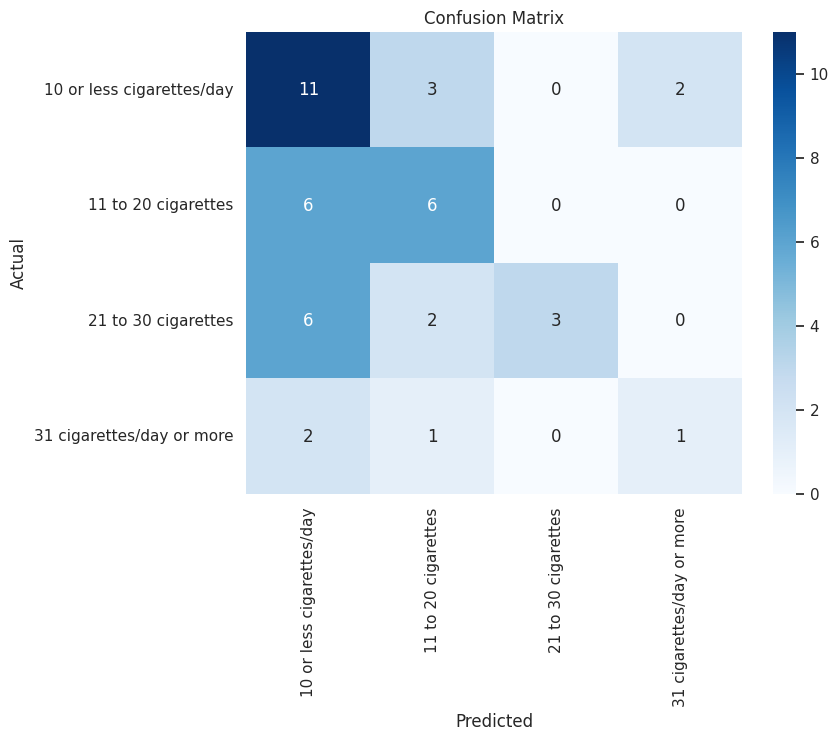

In [ ]:
if not X_test.empty and not y_test.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_,
                yticklabels=le_target.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print('Cannot visualize confusion matrix because Test data is empty.')




---

## **14. Feature Importance Analysis**

Understanding which features have the most significant impact on the model's predictions can provide valuable insights.




--- Feature Coefficients ---
                                              Feature  Coefficient
11  I see myself as someone who is conventional, u...     0.455760
7     I see myself as someone who is reserved, quiet:     0.392732
4   I see myself as someone who is dependable, sel...     0.179280
8   I see myself as someone who is sympathetic, warm:     0.141886
0                                    How old are you?     0.109999
2   I see myself as someone who is extraverted, en...     0.034015
1                                             Gender:     0.000000
12                    How often do you feel stressed?     0.000000
13                                  Employment Status     0.000000
6   I see myself as someone who is open to new exp...    -0.021764
3   I see myself as someone who is critical, quarr...    -0.052563
10  I see myself as someone who is calm, emotional...    -0.058417
5   I see myself as someone who is anxious, easily...    -0.089696
9   I see myself as someone who 

<ipython-input-56-88103d9b612c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


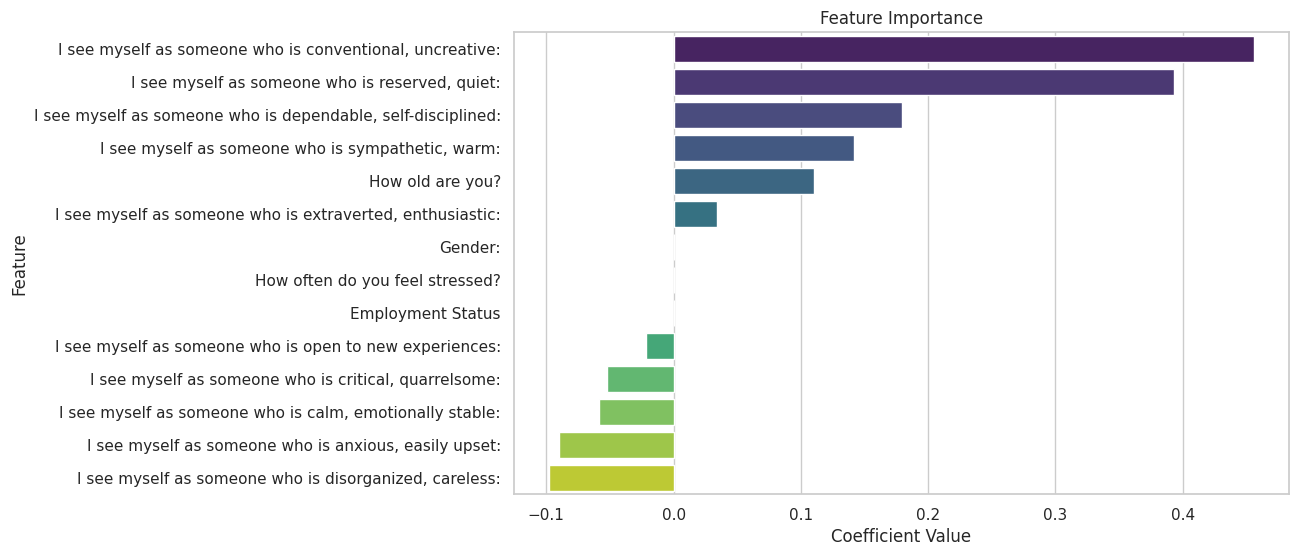

In [ ]:
# Retrieve model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print('\n--- Feature Coefficients ---')
print(coefficients)

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()




---

## **15. Conclusion**

In this notebook, we've successfully:

1. **Loaded and Inspected** the dataset.
2. **Preprocessed** the data by handling missing values and encoding categorical variables.
3. **Trained** a **Logistic Regression** classification model to predict daily cigarette consumption categories.
4. **Evaluated** the model's performance using accuracy, classification reports, and confusion matrices.
5. **Visualized** the model's performance and analyzed feature importance.

---